In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sy
import scipy.stats as ss
import pandas as pd
from scipy.signal import savgol_filter
import string
from scipy.signal import find_peaks
import os
import statistics

from functions.plotting_tools import set_layout
from functions.statistical_analysis import find_peaks_distribution

In [3]:
path ='data/cumulative analysis traces/cell1'
files = os.listdir(path)
files_xls = [f for f in files if f[-3:] == 'xls']
n_all_chr=len(files_xls)
letters=list(string.ascii_lowercase)
chr_vec=['chr {}'.format(letter) for letter in letters[:n_all_chr]]
cell=path[-5:]
set_layout()

In [4]:
plot_fig= False
window=15
polynomial=2
distance_allchr=[]
sel_threshold=0
sel_prominence=0.2


for t in range(len(files_xls)):
    xls=pd.ExcelFile('{}/{}'.format(path,files_xls[t]))
    df = pd.read_excel(xls)
    atoms=df['n atoms']
    series=df['Series']
    filt_series=savgol_filter(series, window,polynomial)
    fract_ent=np.copy(100-filt_series)
    peak= find_peaks(fract_ent, threshold=sel_threshold, prominence=sel_prominence)
    array=np.array(peak[0])
    
    dist=np.zeros(len(array)-1)
    for m in range(len(dist)):
        dist[m]=atoms[array[m+1]]-atoms[array[m]]
        
    for j in range(len(dist)):
        distance_allchr.append(dist[j])    
       
    if plot_fig:
        letter=chr_vec[t][-1:]
        plt.figure()
        plt.plot(atoms, fract_ent, color='m', label='Filtered entangled fraction')
        plt.scatter(atoms[array],fract_ent[array], label='Local maxima')
        string_title='Chromosome {}'.format(letter)
        plt.title(string_title.upper())
        plt.xlabel('number of particles (100 kb)')
        plt.ylabel('Entagled fraction (%)')    
        plt.xlim(20,atoms[len(atoms)-1])
        plt.legend()

Plot distribution distance between peaks

[121.09807032 458.90192968]


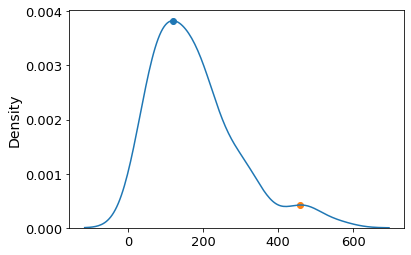

In [5]:
x, peaks= find_peaks_distribution(distance_allchr,1)
max_dist=x[peaks]
print(max_dist)


max_dist=max_dist[0]
mean_dist=np.mean(distance_allchr)
median_dist=statistics.median(distance_allchr)
mode_dist=statistics.mode(distance_allchr)
std_dist=np.std(distance_allchr)